# Step 1: Setup - Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Step 2: Data Loading and Initial Inspection

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Interpretation of .info():

The dataset contains 891 entries (passengers) and 12 columns.
Missing Values Identified: Age, Cabin, and Embarked have missing values. Cabin is missing a significant amount of data (~77%), which will require special attention.

In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Interpretation of .describe():

Survived: About 38.4% of passengers in this dataset survived.
Age: The age ranges from ~5 months to 80 years, with an average age of about 30.
Fare: The fare is highly skewed, with a mean of 
14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

In [6]:
data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

# Step 3 Data Cleaning

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
median_age = data['Age'].median()
print(median_age)

28.0


In [9]:
data['Age'] = data['Age'].fillna(median_age)

In [10]:
mode_embarked = data['Embarked'].mode()[0]
print(mode_embarked)

S


In [11]:
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

In [12]:
data['Has_Cabin'] = data['Cabin'].notna().astype(int)
data.drop(['Cabin'], axis=1, inplace = True) 

In [13]:
data['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [14]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  Has_Cabin  
0        0         A/5 21171   7.2500        S          0  
1        0          PC 17599  71.2833        C          1  
2        0  STON/O2. 3101282   7.9250        S          0  
3        0            113803  53.1000        S          1  
4        0            373450   8.0500        S          0  
..     ...               ...      ...      ...        ...  
886      0            211536  13.0000        S          0  
887      0            112053  30.0000        S          1  
888      2        W./C. 6607  23.4500        S          0  
889      0            111369  30.0000        C          1  
890      0            370376   7.7500        Q          0  

[891 rows x 12 columns]

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

# Step 4: Univariate Analysis 

Analyzing categorical features:


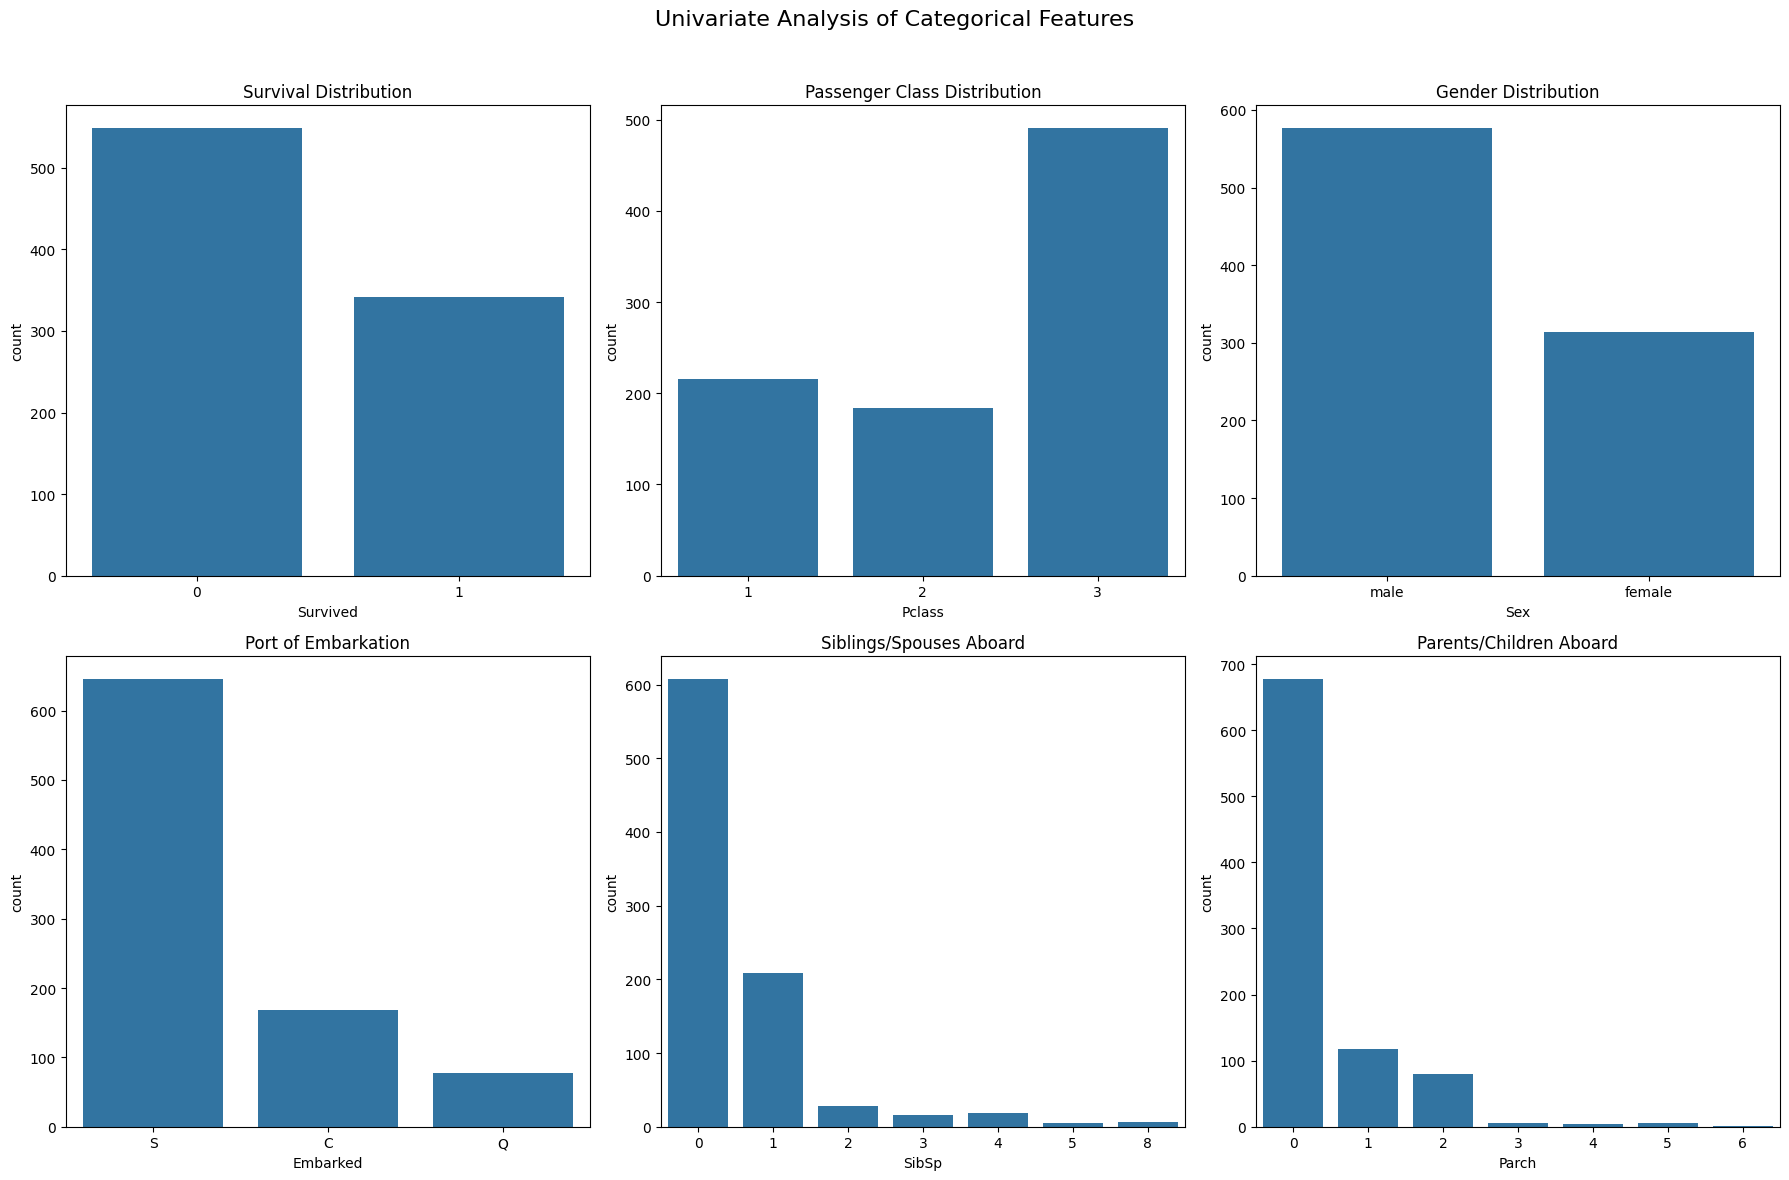

In [16]:
print("Analyzing categorical features:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0, 0], x='Survived', data=data).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=data).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=data).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=data).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=data).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=data).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key Insights (Categorical):

Survival: Most passengers (over 500) did not survive.
Pclass: The 3rd class was the most populated, followed by 1st and then 2nd.
Sex: There were significantly more males than females.
Embarked: The vast majority of passengers embarked from Southampton ('S').
SibSp & Parch: Most passengers traveled alone.


Analyzing numerical features:


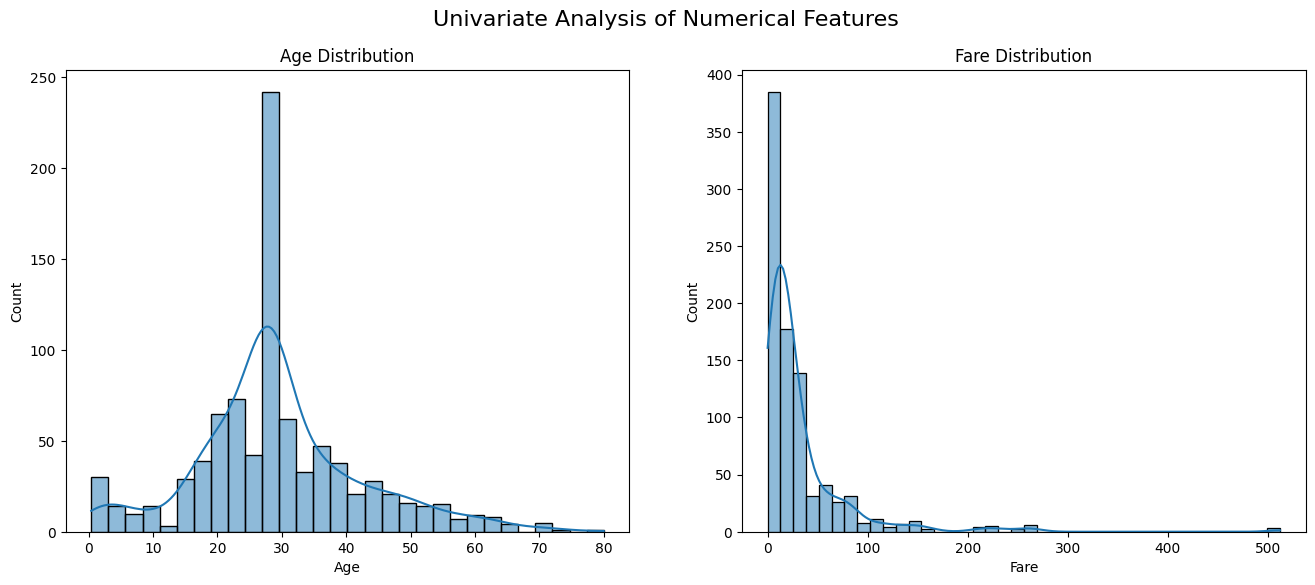

In [17]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

sns.histplot(ax=axes[0], data=data, x='Age', kde=True, bins=30).set_title('Age Distribution')

sns.histplot(ax=axes[1], data=data, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

Key Insights (Numerical):
- Age: The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- Fare: The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

# Step 5: Bivariate Analysis

Bivariate Analysis: Feature vs. Survival


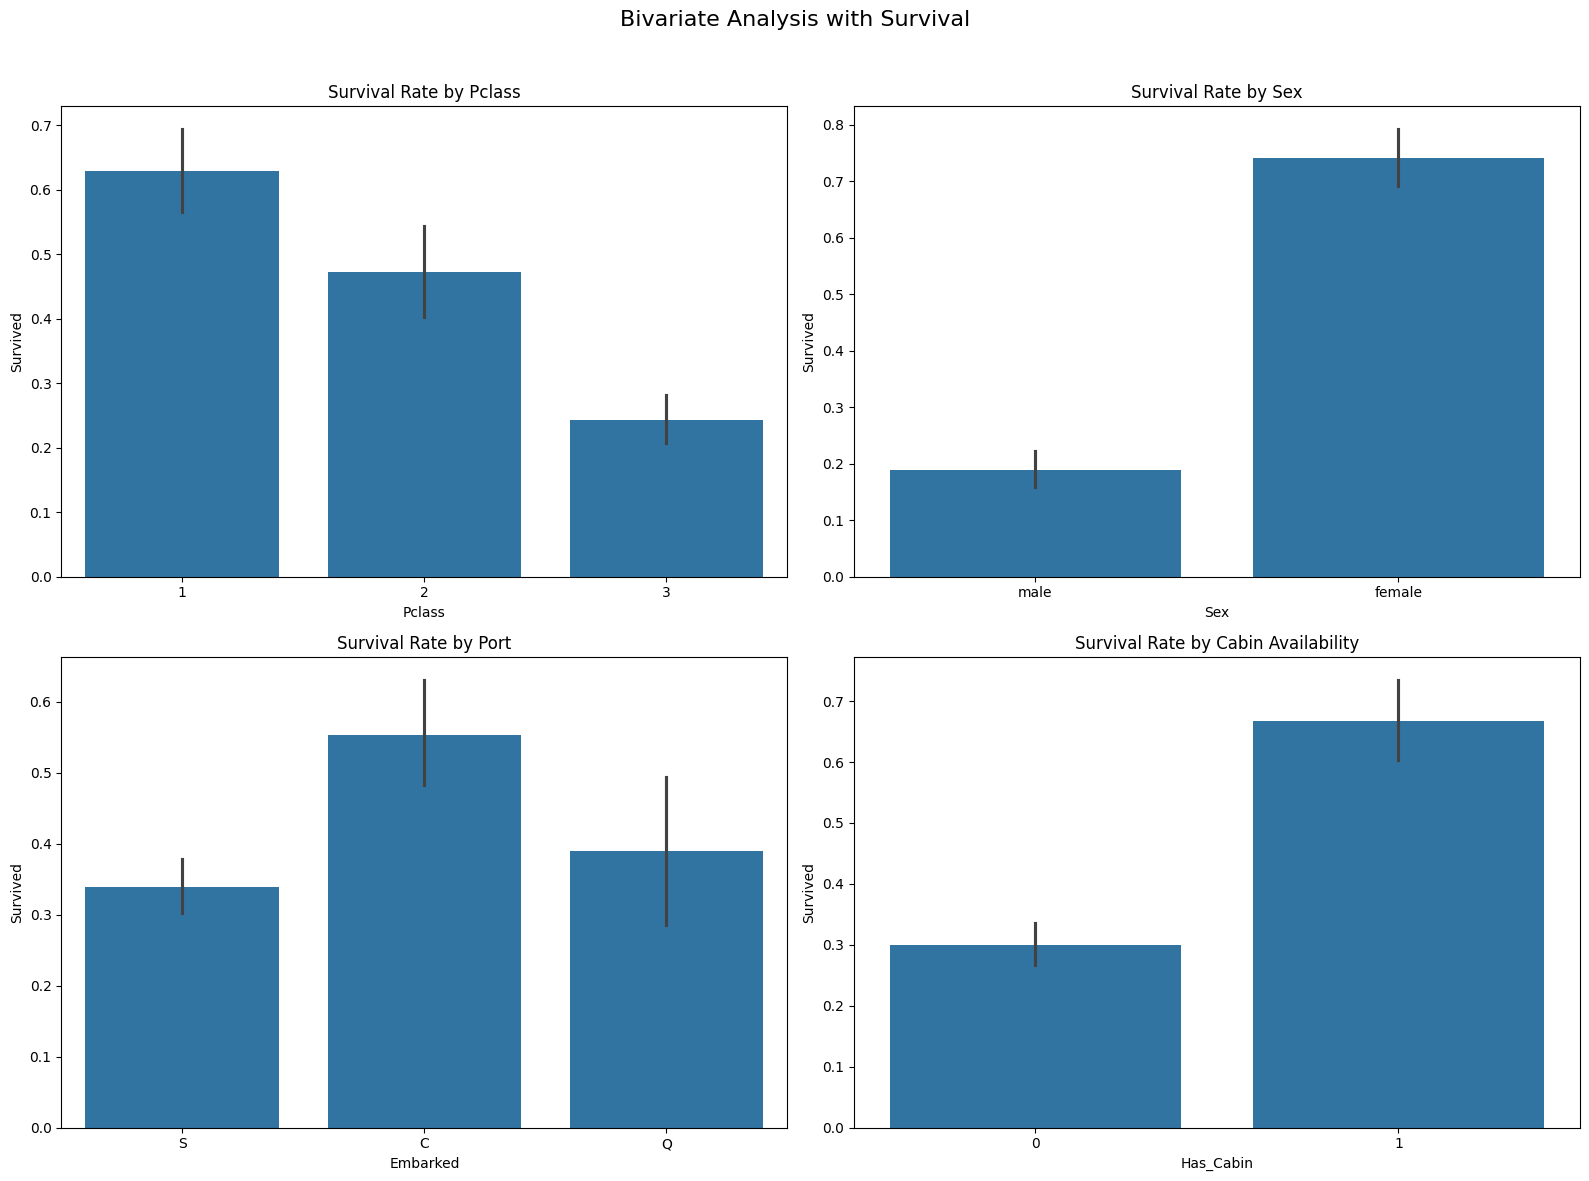

In [18]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=data).set_title('Survival Rate by Pclass')

sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=data).set_title('Survival Rate by Sex')

sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=data).set_title('Survival Rate by Port')

sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=data).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

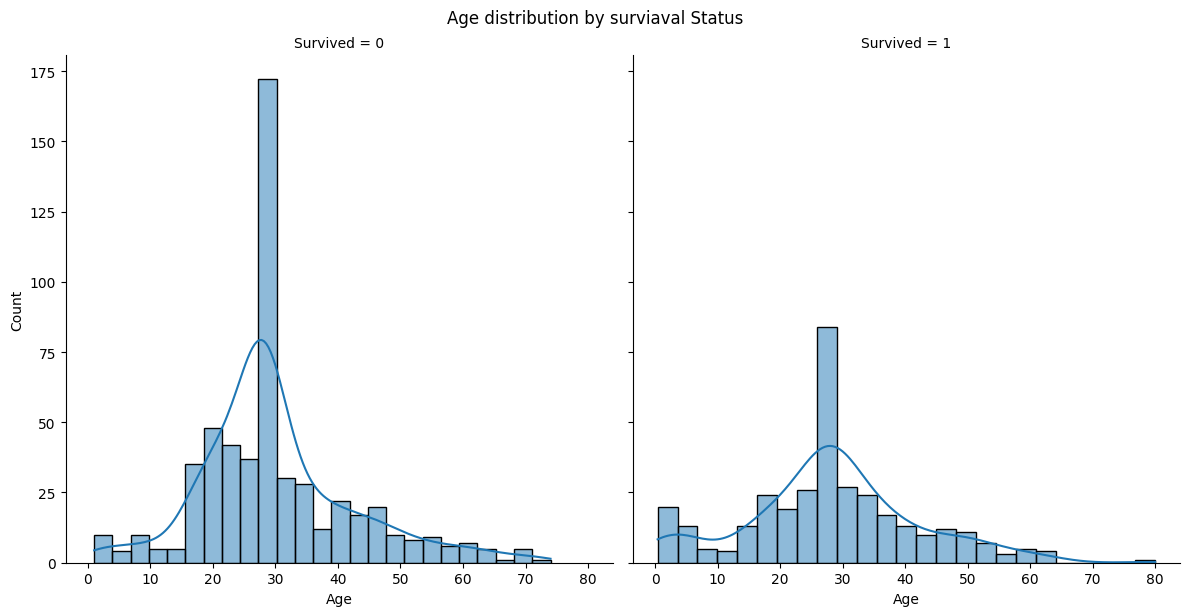

In [19]:
g = sns.FacetGrid(data, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age distribution by surviaval Status', y = 1.02)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

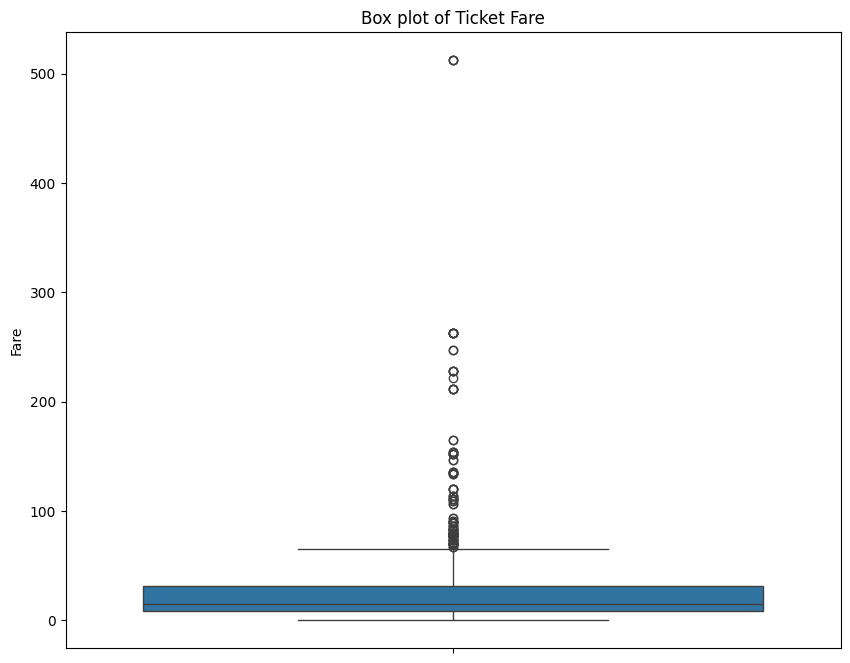

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare' , data=data)
plt.title('Box plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

# Step 5: Feature Engineering 

In [21]:
# 1. Create a 'FamilySize' feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
data[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

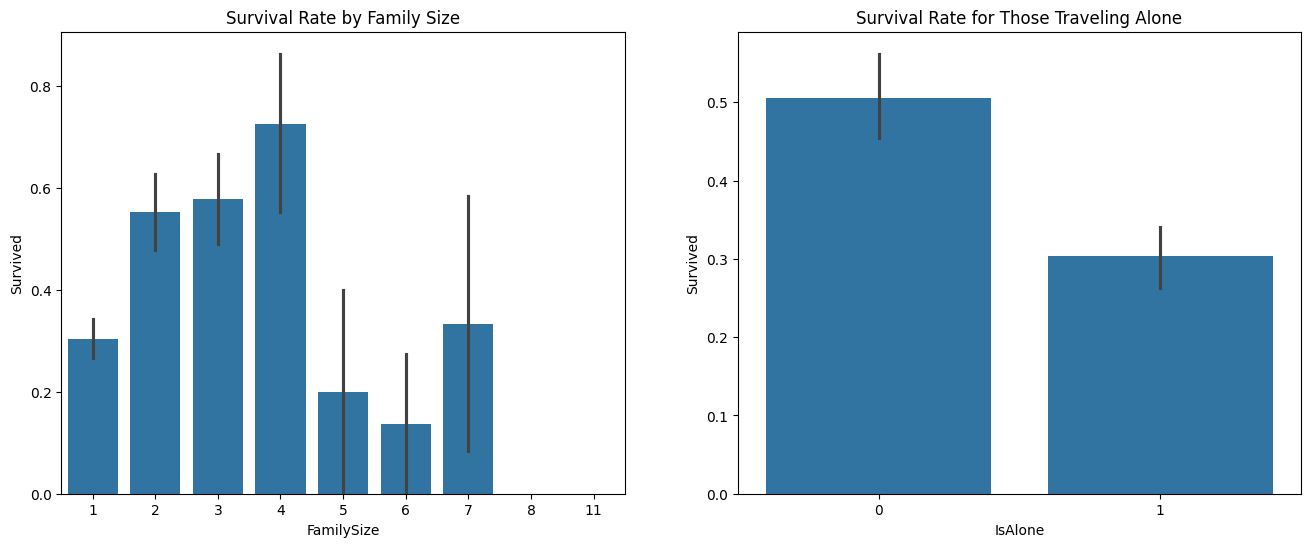

In [22]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=data).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=data).set_title('Survival Rate for Those Traveling Alone')

plt.show()

Insight:

Passengers who were alone (IsAlone=1) had a lower survival rate (~30%) than those in small families.
Small families of 2 to 4 members had the highest survival rates.
Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [23]:
# 3. Extract 'Title' from the 'Name' column
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
data['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

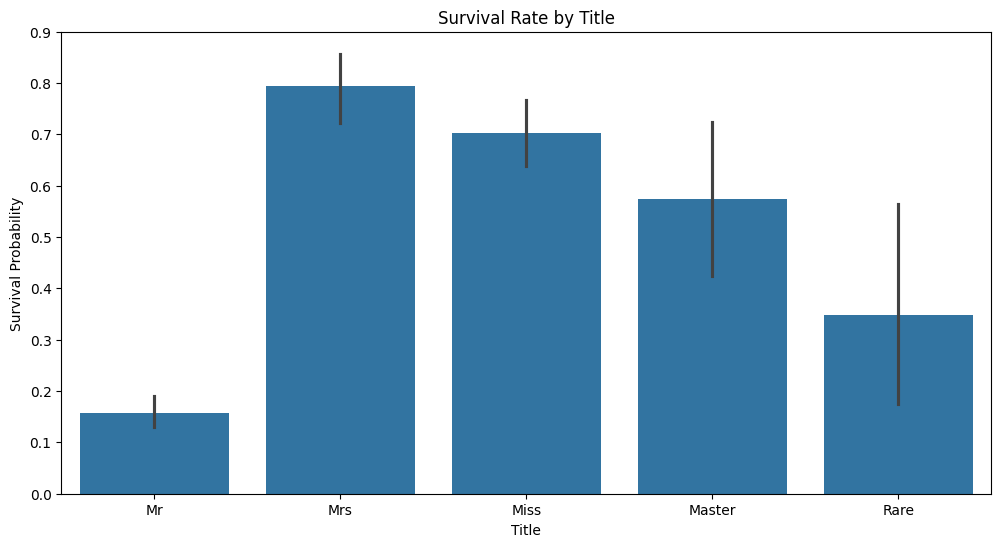

In [24]:
# Simplify the titles by grouping rare ones into a 'Rare' category
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=data)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

Insight: The Title feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

# Step 7: Multivariate Analysis 

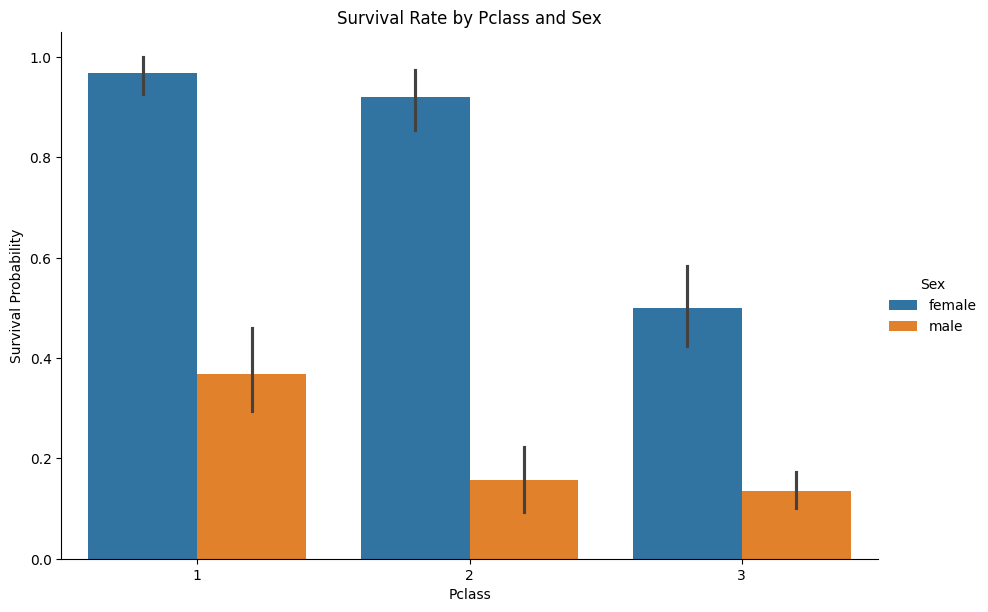

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()


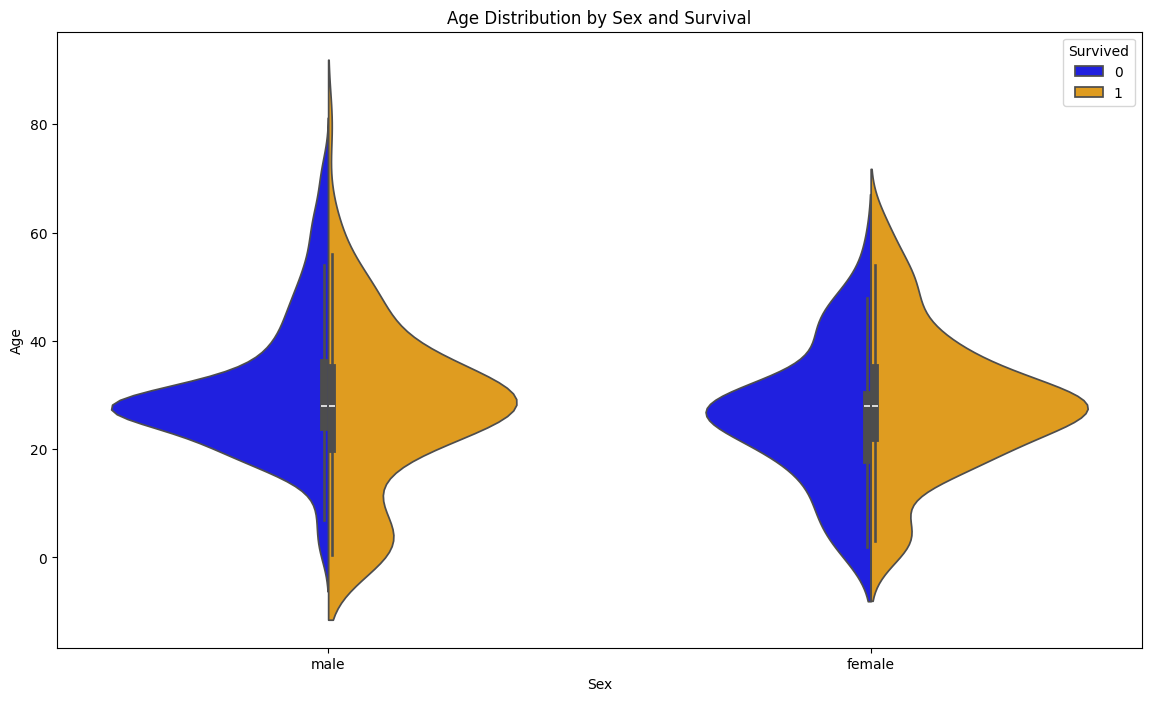

In [26]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()


# Step 8: Corrleation Analysis 

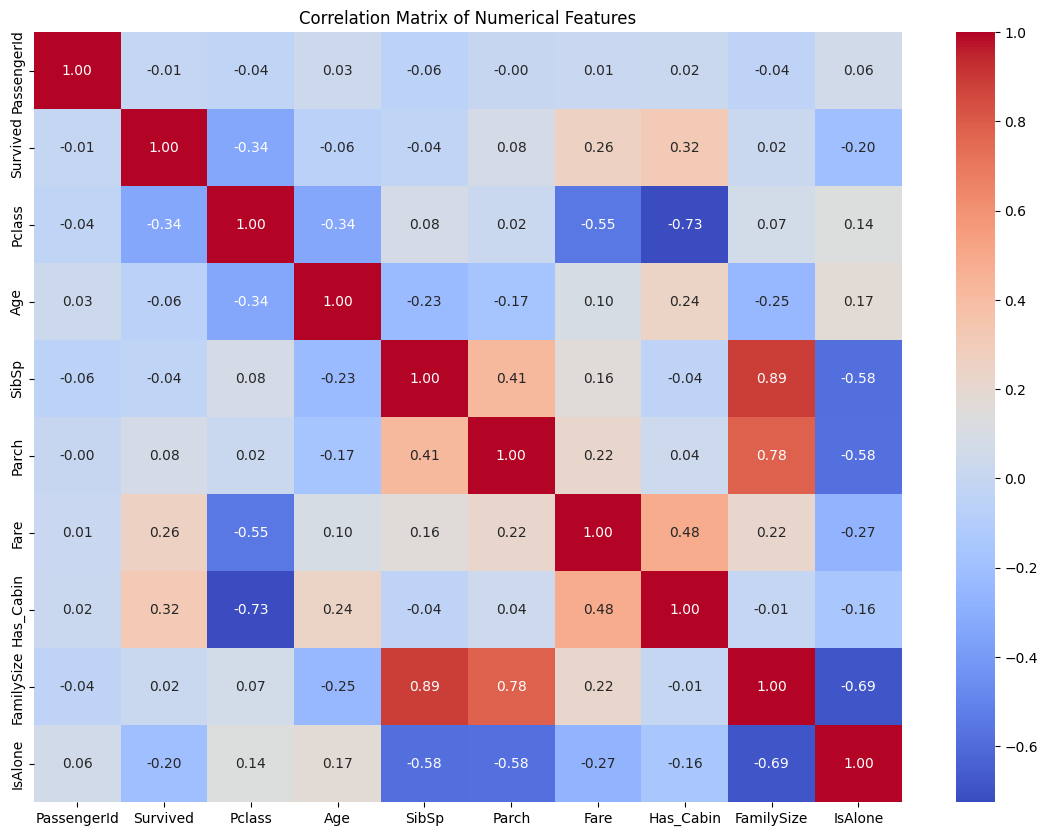

In [27]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

In [36]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


In [37]:
profile.to_file("titanic_dataAnalysis.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.93it/s]
